<a href="https://colab.research.google.com/github/Monika9763/Jeremy-Howard-Squadron-/blob/main/Copy_of_Implementation_of_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
#from haversine import haversine
import xgboost
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
#import klib

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

<ipython-input-5-745599eae495>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris (1).csv')
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
label_encoder = LabelEncoder()

data['Species'] = label_encoder.fit_transform(data['Species'])

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


<Axes: >

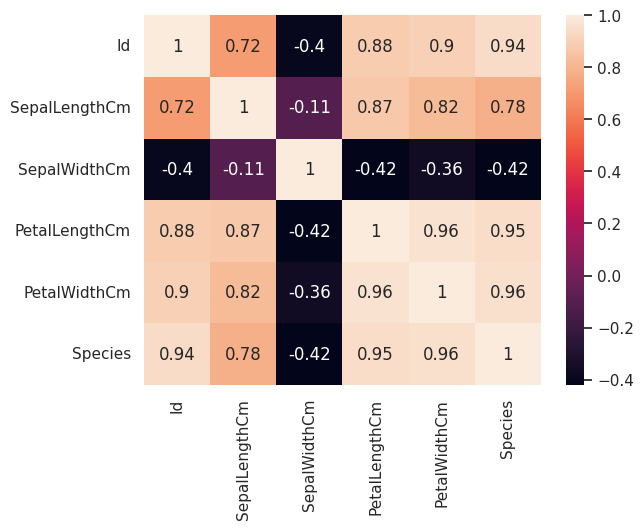

In [ ]:
sns.heatmap(data.corr(), annot = True)

In [ ]:
data_float = data.astype(float)

In [ ]:
X = data[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(108, 5)
(30, 5)


In [ ]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models,regularizers,callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


In [ ]:
input_neurons = X_train.shape[1]  # Number of features
hidden_neurons = 64  # Number of neurons in the hidden layer
output_neurons = 1  # Number of output neurons
# define the model
model = models.Sequential([
    # Input layer
    layers.Input(shape=(input_neurons,)),
    layers.Dense(128,kernel_initializer=GlorotNormal(), activation='relu'),
    layers.Dense(96,kernel_initializer=GlorotNormal(), activation='relu'),
    layers.Dense(56,kernel_initializer=GlorotNormal(), activation='relu'),
    layers.Dense(32,kernel_initializer=GlorotNormal(), activation='relu'),
    layers.Dense(output_neurons, activation='sigmoid',kernel_initializer=GlorotNormal())
])


In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
4/4 [==============================] - 1s 83ms/step - loss: 0.6516 - accuracy: 0.4352 - val_loss: 0.5547 - val_accuracy: 0.6667
Epoch 2/10
4/4 [==============================] - 0s 16ms/step - loss: 0.4867 - accuracy: 0.6111 - val_loss: 0.4003 - val_accuracy: 0.6667
Epoch 3/10
4/4 [==============================] - 0s 21ms/step - loss: 0.3113 - accuracy: 0.6296 - val_loss: 0.1805 - val_accuracy: 0.6667
Epoch 4/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0603 - accuracy: 0.6296 - val_loss: -0.1197 - val_accuracy: 0.6667
Epoch 5/10
4/4 [==============================] - 0s 14ms/step - loss: -0.2703 - accuracy: 0.6296 - val_loss: -0.4841 - val_accuracy: 0.6667
Epoch 6/10
4/4 [==============================] - 0s 20ms/step - loss: -0.6888 - accuracy: 0.6296 - val_loss: -0.9504 - val_accuracy: 0.6667
Epoch 7/10
4/4 [==============================] - 0s 21ms/step - loss: -1.2300 - accuracy: 0.6296 - val_loss: -1.5862 - val_accuracy: 0.6667
Epoch 8/10
4/4 [====

In [ ]:
# implementation of L1& L2 regularization
model = models.Sequential([
    layers.Input(shape=(input_neurons,)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(96, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(output_neurons, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
4/4 [==============================] - 1s 91ms/step - loss: 3.1830 - accuracy: 0.3889 - val_loss: 2.9832 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 0s 21ms/step - loss: 2.8859 - accuracy: 0.5926 - val_loss: 2.7402 - val_accuracy: 0.6667
Epoch 3/10
4/4 [==============================] - 0s 20ms/step - loss: 2.6386 - accuracy: 0.6296 - val_loss: 2.5059 - val_accuracy: 0.6667
Epoch 4/10
4/4 [==============================] - 0s 20ms/step - loss: 2.3781 - accuracy: 0.6296 - val_loss: 2.2440 - val_accuracy: 0.6667
Epoch 5/10
4/4 [==============================] - 0s 20ms/step - loss: 2.0876 - accuracy: 0.6296 - val_loss: 1.9543 - val_accuracy: 0.6667
Epoch 6/10
4/4 [==============================] - 0s 24ms/step - loss: 1.7838 - accuracy: 0.6296 - val_loss: 1.6177 - val_accuracy: 0.6667
Epoch 7/10
4/4 [==============================] - 0s 15ms/step - loss: 1.4081 - accuracy: 0.6296 - val_loss: 1.2276 - val_accuracy: 0.6667
Epoch 8/10
4/4 [===========

In [ ]:
test_loss,test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss:{test_loss}, Test_Accuracy: {test_accuracy}')

1/1 [==============================] - 0s 31ms/step - loss: -2.6593 - accuracy: 0.8000
Test Loss:-2.659325361251831, Test_Accuracy: 0.800000011920929


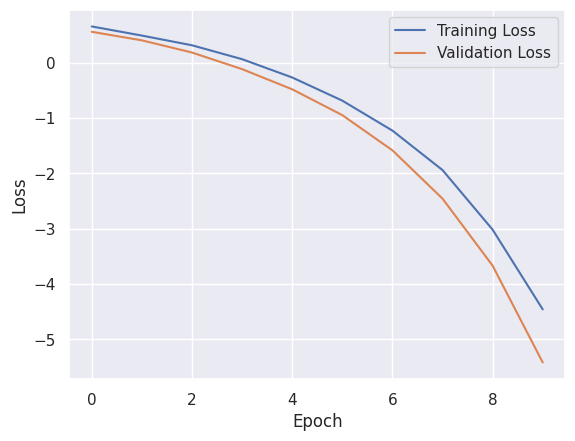

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

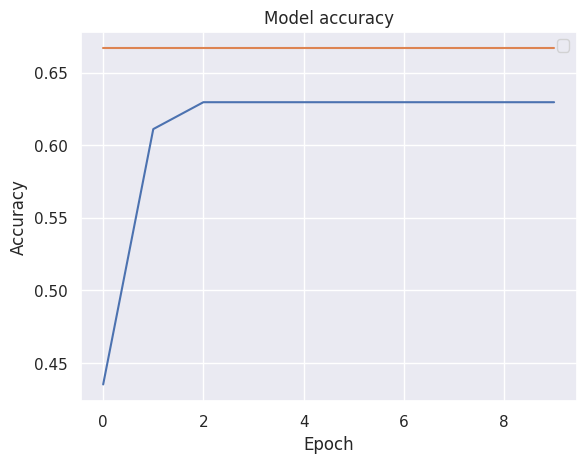

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks



# Define the model
model = models.Sequential([
    layers.Input(shape=(input_neurons,)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dropout(0.5),
    layers.Dense(96, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')

])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/10
4/4 [==============================] - 1s 97ms/step - loss: 3.2555 - accuracy: 0.3426 - val_loss: 3.0284 - val_accuracy: 0.6667
Epoch 2/10
4/4 [==============================] - 0s 17ms/step - loss: 3.1042 - accuracy: 0.4259 - val_loss: 2.8607 - val_accuracy: 0.6667
Epoch 3/10
4/4 [==============================] - 0s 16ms/step - loss: 2.8049 - accuracy: 0.3889 - val_loss: 2.7013 - val_accuracy: 0.6667
Epoch 4/10
4/4 [==============================] - 0s 15ms/step - loss: 2.4213 - accuracy: 0.4630 - val_loss: 2.5332 - val_accuracy: 0.6667
Epoch 5/10
4/4 [==============================] - 0s 21ms/step - loss: 2.4727 - accuracy: 0.4167 - val_loss: 2.3525 - val_accuracy: 0.6667
Epoch 6/10
4/4 [==============================] - 0s 22ms/step - loss: 2.2309 - accuracy: 0.4167 - val_loss: 2.1547 - val_accuracy: 0.6667
Epoch 7/10
4/4 [==============================] - 0s 22ms/step - loss: 1.9946 - accuracy: 0.3889 - val_loss: 1.9386 - val_accuracy: 0.6667
Epoch 8/10
4/4 [===========

In [ ]:
# get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# classification report
print(classification_report(y_test,y_pred))

1/1 [==============================] - 0s 30ms/step
              precision    recall  f1-score   support

           0       0.37      1.00      0.54        11
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         6

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30

